<h1><div class="alert alert-block alert-info">
Time Series - Moving Average and Differencing
</div></h1>

<h2>Describing a time series in terms of its components</h2>

<b>Additive: </b> $x_t = T_t + S_t + \epsilon _t$

<b>Multiplicative: </b> $x_t = T_t * S_t * \epsilon _t$

where :
- $T_t$ is the trend,
- $S_t$ is the seasonal pattern (of period T)
- $\epsilon_t$ is the residual part

💡 If $x_t$ has a multiplicative effect, we can work with $log(x_t)$ to use and additive model

In [5]:
library(forecast)
library(ggplot2)

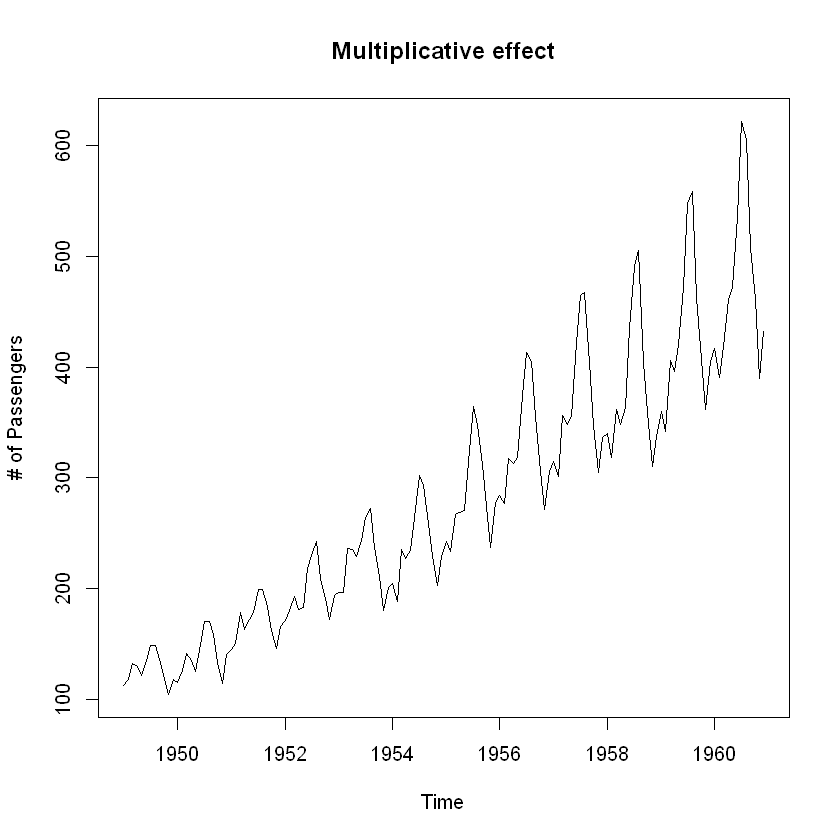

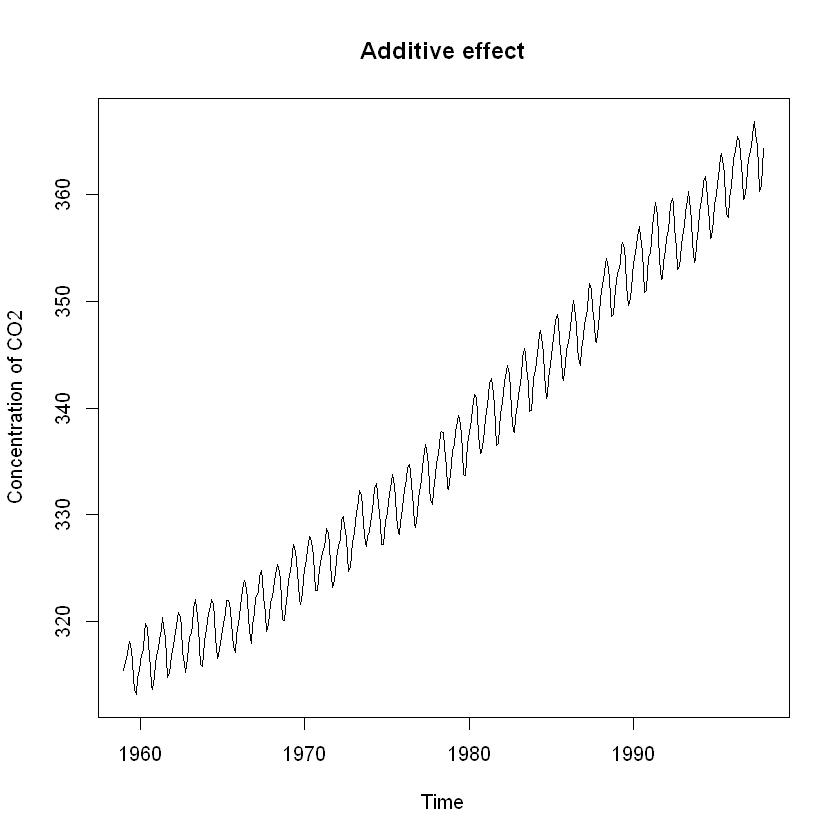

In [6]:
plot(AirPassengers, xlab = "Time", ylab = "# of Passengers", main ='Multiplicative effect')
plot(co2, xlab = "Time", ylab = "Concentration of CO2", main ='Additive effect')

In order to modelize the stochastic part of the times series, we have to remove the deterministic part (trend + seasonal pattern). We will see two methods:
- Estimation by moving average
- Removing by differencing

<h2>Moving average</h2>

A moving average estimation of the trend Tt of order m (m-MA) is:

$\hat T_t = \frac {1}{m} \sum_{j=-k}^kx_{t+j}$ where $m = 2k + 1$

$\hat T_t $ is the average of the m values nearby time t.
- greater is m, greater is the smoothing
- for series with seasonnal pattern of period T, we generally

choose m = 2T if T is even and m = T if T is odd.

In plain english, a moving average of 20 days, adds up the values of the last 20 observations and divide it by 20.

💡 <font color = 'green'><b>Advantage:</b></font> quickly gives an overview of the components of the series

💡 <font color = 'red'><b>Disadvantage:</b></font> no forecast is possible with such non parametric estimation

Warning message:
"Removed 6 rows containing missing values (geom_path)."
Warning message:
"Removed 12 rows containing missing values (geom_path)."


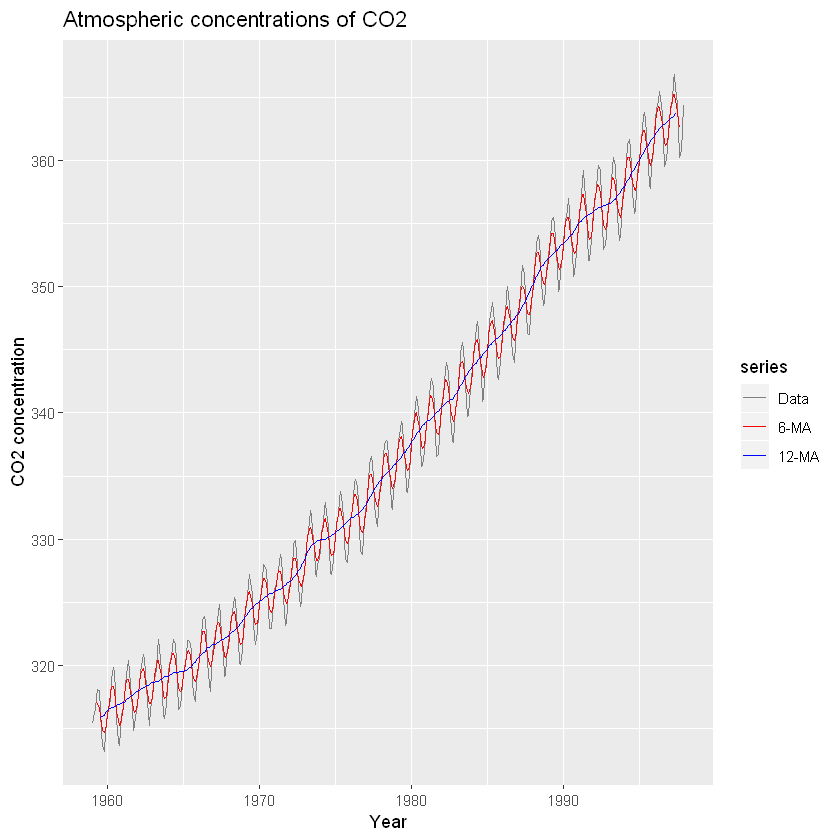

In [7]:
autoplot(co2, series="Data") +
autolayer(ma(co2,6), series="6-MA") +
autolayer(ma(co2,12), series="12-MA") +
xlab("Year") + ylab("CO2 concentration") +
ggtitle("Atmospheric concentrations of CO2 ") +
scale_colour_manual(
values=c("Data"="grey50","6-MA"="red","12-MA"="blue"),
breaks=c("Data","6-MA","12-MA"))

Once the trend $T_t$ has been estimated, we remove it from the series:

$\tilde x_t = x_t − \hat T_t$

Estimation of the seasonal pattern is obtained by simply averaging the values of $\tilde x_t$ on each season.

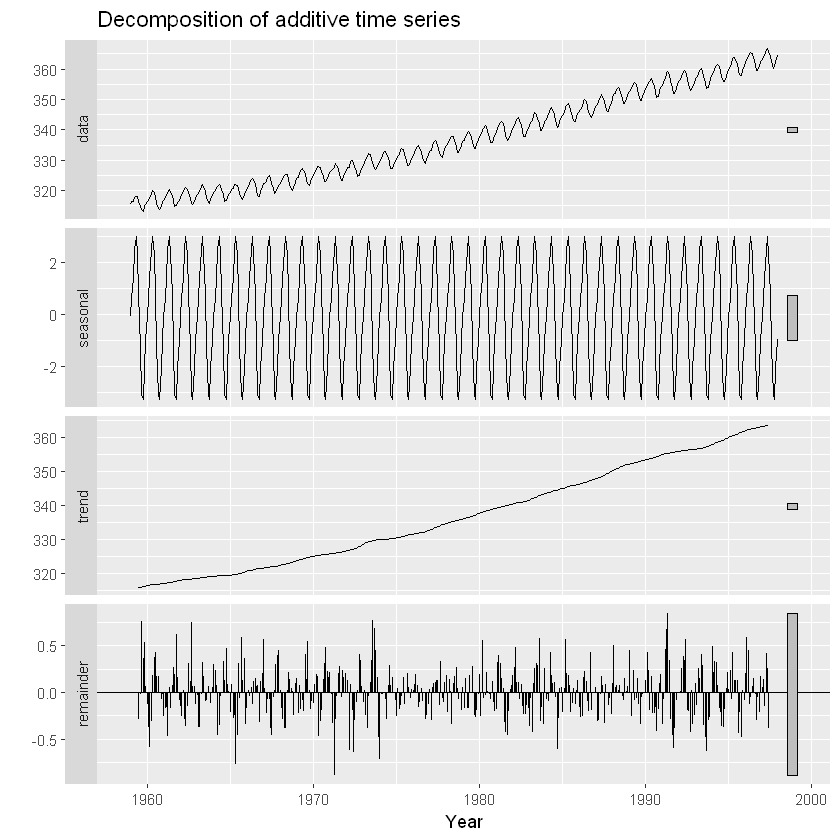

In [8]:
autoplot(decompose(co2,type="additive"))+
xlab('Year')

<h2>Differencing</h2>

Differencing means taking the difference between two value of the series, considering a lag. The lag indicates how far apart these two values are.

Let $\Delta T$ be the operator of lag T which maps $x_t$ to $x_t − x_{t−T}$ :
$\Delta T x_t = x_t − x_{t−T}$

💡 <b>Lag-1 differencing</b> is useful for removing <font color = 'blue'><b>trend</font></b>.

💡 <b>Lag-M differencing</b> is useful for removing <font color = 'blue'><b>seasonality</font></b> with M seasons.

💡 <b>Double-differencing</b> removes trend and seasonality.

<font color ='blue'><b>Applying $\Delta _T^k$ remove a seasonal pattern of period T and a polynomial trend of order k</b></font>

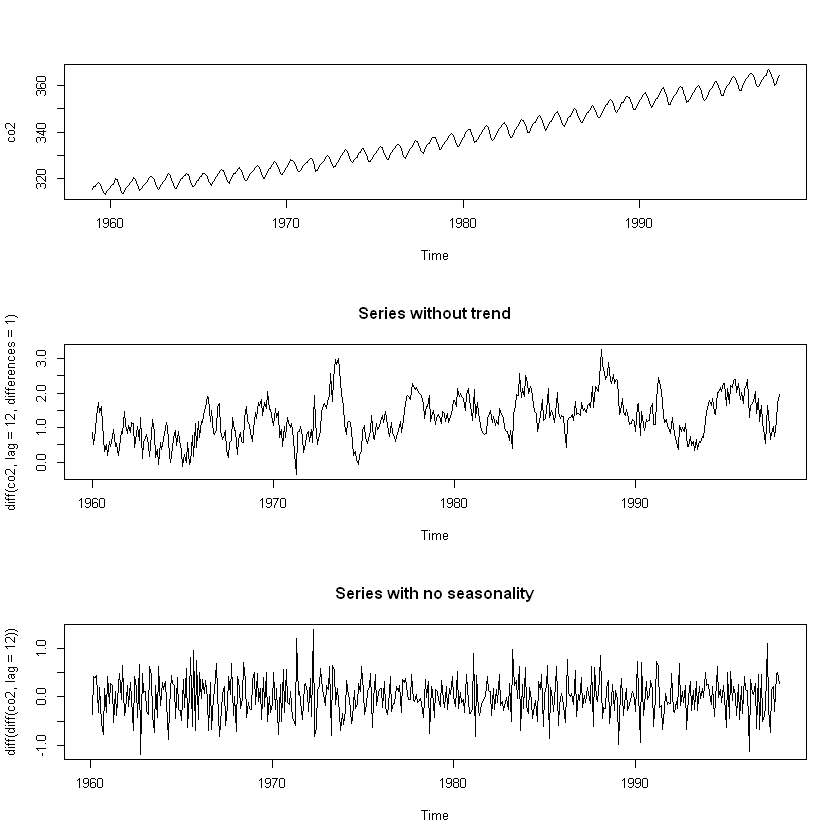

In [9]:
par(mfrow=c(3,1))
plot(co2)
plot(diff(co2,lag=12,differences=1),main='Series without trend')
plot(diff(diff(co2,lag=12)),main='Series with no seasonality')

<b>Advantage :</b>
- easy to understand
- allows forecast since we can forecast T xt and then go back to
$x_t$
<b>In practice :</b>
- we start by removing the season by applying $\Delta T$
- then, if it visually does not seem stationary, we apply again $\Delta 1$
- eventually we apply again $\Delta 1$, but we will try to keep small
value for the number k of differencing.

<h2>Stationary series</h2>

$x_t$ is a stationary time series if, for all s, the distribution of
$(x_t , . . . , x_{t+s} )$ does not depend on t.
Consequently, a stationary time serie is one whose properties do not
depend on the time at which the series is observed.
In particular, a stationary time serie has:
- no trend
- no season pattern
<i>(A stationary time serie can have a cyclic pattern since its period is
not constant.)</i>
ARMA models, one of the main objects of this course, are models
for stationary time serie.

<h2>White noise</h2>

A white noise is an independent and identically distributed series
with zero mean.
A Gaussian white noise $\epsilon _t$ are i.i.d. observations from $N(0, \sigma^2)$
In such series, there is nothing to forecast. Or more precisely, the
best forecast for such series is its means: 0.

💡 After having differecing our time series for removing trend +
seasonal pattern, we have to check that the residual series is
not a white noise. If it is our work is finished: there is nothing else to
forecast than trend and seasonal pattern, thus let use exponential
smoothing.

In [13]:
Box.test(diff(co2,lag=12,differences=1),lag=10,type="Ljung-Box")


	Box-Ljung test

data:  diff(co2, lag = 12, differences = 1)
X-squared = 1415.4, df = 10, p-value < 2.2e-16
